CS 109 Fall 2016 Project
Stephen Klosterman

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Mapping practice

In [2]:
# #Mapping practice
# import cartopy.crs as ccrs
# import matplotlib.pyplot as plt
# import cartopy.io.shapereader as shpreader
# import itertools


# shapename = 'admin_0_countries'
# countries_shp = shpreader.natural_earth(resolution='110m',
#                                         category='cultural', name=shapename)

# # some nice "earthy" colors
# earth_colors = np.array([(199, 233, 192),
#                                 (161, 217, 155),
#                                 (116, 196, 118),
#                                 (65, 171, 93),
#                                 (35, 139, 69),
#                                 ]) / 255.
# earth_colors = itertools.cycle(earth_colors)



# ax = plt.axes(projection=ccrs.PlateCarree())
# for country in shpreader.Reader(countries_shp).records():
# #     print country.attributes['name_long'], earth_colors.next()
#     ax.add_geometries(country.geometry, ccrs.PlateCarree(),
#                       facecolor=earth_colors.next())#,
# #                       label=country.attributes['name_long'])

# # plt.show()

# Cardiovascular disease data

In [55]:
#Cardiovascular disease data
cardio_file = 'data/data.csv'
cardio_data = pd.read_csv(cardio_file)

#Get rid of male and female only results
cardio_data = cardio_data.drop(['Age-standardized mortality rate by cause (per 100 000 population).1', \
                  'Age-standardized mortality rate by cause (per 100 000 population).2'], axis=1)

cardio_2012 = cardio_data[cardio_data['Unnamed: 1'].isin(['2000'])]

cardio_2012 = cardio_2012.drop(['Unnamed: 1'], axis=1)

#Rename Unnamed: 0 to AreaName for merging with meat data...
#This not necessary to be the same name, just that country names are used
#as indices
cardio_2012 = cardio_2012.rename(columns={'Unnamed: 0' : 'Country'})

#Set this as index
cardio_2012 = cardio_2012.set_index(['Country'])

cardio_2012.head()

for item in cardio_2012.index:
    print item

#Limit this analysis to work with 2012 data
# cardio_2012 = cardio_data[cardio_data['Unnamed: 1'].isin(['2012'])]
# cardio_2012.count()  #172
# cardio_2012.head()

# cardio_2012['Unnamed: 0'].unique()

#Country List
# cardio_countries = cardio_2012['Unnamed: 0']
# np.shape(cardio_countries)  #172

#This is the disease per capita number
# cardio_data['Unnamed: 1'].unique()

# cardio_2012['2', ['Unnamed: 0']]
# cardio_2012.index
# testing = cardio_2012['Unnamed: 0'].isin(['Afghanistan'])
# sum(testing)

#Create empty arrays for country name, numbers
# fish_consumption = np.ones(fish_2012.shape[0]) * np.nan
# cardio_disease = np.ones(fish_2012.shape[0]) * np.nan
#fish_2012.AreaName gives the corresponding list of countries

Afghanistan
Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia (Plurinational State of)
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cote d'Ivoire
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Croatia
Cuba
Cyprus
Czech Republic
Democratic People's Republic of Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran (Islamic Republic of)
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kuwait
Kyrgyzstan
Lao People's Democratic Republic
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mali
M

# Crop data

In [56]:
#Read in crops data for checking row number
crop_file = './data/1caaffac-d01c-4d02-8735-404d3089b47e.csv'
crop_data = pd.read_csv(crop_file)

In [57]:
crop_data.head()

,﻿Domain Code,Domain,AreaCode,AreaName,ElementCode,ElementName,ItemCode,ItemName,Year,Value,Flag,FlagD
0,CC,Food Supply - Crops Primary Equivalent,1,Armenia,511,Total Population - Both sexes,2501,Population,1992,3449,NaN,Official data
1,CC,Food Supply - Crops Primary Equivalent,1,Armenia,511,Total Population - Both sexes,2501,Population,1993,3370,NaN,Official data
2,CC,Food Supply - Crops Primary Equivalent,1,Armenia,511,Total Population - Both sexes,2501,Population,1994,3290,NaN,Official data
3,CC,Food Supply - Crops Primary Equivalent,1,Armenia,511,Total Population - Both sexes,2501,Population,1995,3223,NaN,Official data
4,CC,Food Supply - Crops Primary Equivalent,1,Armenia,511,Total Population - Both sexes,2501,Population,1996,3173,NaN,Official data


In [58]:
#Check other format of data download
#Read in crops data for checking row number
# crop_file_2 = './data_new/FoodSupply_Crops_E_All_Data.csv'
# crop_data_2 = pd.read_csv(crop_file_2)
# crop_data_2.head(25)


In [59]:
# print crop_data.ElementName.unique()
# print crop_data.Year.unique()

#ItemNames
crop_items = crop_data.ItemName.unique()
#Get rid of "population" and "nan"
crop_items = crop_items[1:-1]
#Get rid of Grand Total
crop_items = crop_items[np.not_equal(crop_items, 'Grand Total')]
# print crop_items

# Want to get, for each type of data, for each country:
#The values for the decade before 2012.  This could be a sum.
#Probably also want the NaN count

#Try subsetting just "Fish, Seafood", 
#'Food supply quantity (kg/capita/yr)'
#Decade before 2012?

# for meat_name in meat_items:
combined_mask = crop_data.ItemName.isin(crop_items) & \
    crop_data.ElementName.isin(['Food supply quantity (kg/capita/yr)']) & \
    (crop_data.Year <= 2000) & \
    (crop_data.Year >= 1990)
crop_subset = crop_data[combined_mask]

crop_subset.head()

,﻿Domain Code,Domain,AreaCode,AreaName,ElementCode,ElementName,ItemCode,ItemName,Year,Value,Flag,FlagD
1440,CC,Food Supply - Crops Primary Equivalent,1,Armenia,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,1992,156.16,Fc,Calculated data
1441,CC,Food Supply - Crops Primary Equivalent,1,Armenia,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,1993,161.44,Fc,Calculated data
1442,CC,Food Supply - Crops Primary Equivalent,1,Armenia,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,1994,153.78,Fc,Calculated data
1443,CC,Food Supply - Crops Primary Equivalent,1,Armenia,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,1995,154.23,Fc,Calculated data
1444,CC,Food Supply - Crops Primary Equivalent,1,Armenia,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,1996,156.34,Fc,Calculated data


# Meat and fish data

In [74]:
#Load data
meat_fish_file = './data/c1da0671-f39b-4d39-a421-6a19af9d6cd1.csv'
meat_fish_data = pd.read_csv(meat_fish_file)

In [75]:
#Explore data
meat_fish_data.head()

,IDomain Code,Domain,AreaCode,AreaName,ElementCode,ElementName,ItemCode,ItemName,Year,Value,Flag,FlagD
0,CL,Food Supply - Livestock and Fish Primary Equiv...,1,Armenia,511,Total Population - Both sexes,2501,Population,1992,3449,NaN,Official data
1,CL,Food Supply - Livestock and Fish Primary Equiv...,1,Armenia,511,Total Population - Both sexes,2501,Population,1993,3370,NaN,Official data
2,CL,Food Supply - Livestock and Fish Primary Equiv...,1,Armenia,511,Total Population - Both sexes,2501,Population,1994,3290,NaN,Official data
3,CL,Food Supply - Livestock and Fish Primary Equiv...,1,Armenia,511,Total Population - Both sexes,2501,Population,1995,3223,NaN,Official data
4,CL,Food Supply - Livestock and Fish Primary Equiv...,1,Armenia,511,Total Population - Both sexes,2501,Population,1996,3173,NaN,Official data


In [76]:
print meat_fish_data.ElementName.unique()

['Total Population - Both sexes' 'Food supply quantity (tonnes)'
 'Food supply quantity (kg/capita/yr)'
 'Food supply quantity (g/capita/day)' 'Food supply (kcal/capita/day)'
 'Protein supply quantity (g/capita/day)'
 'Fat supply quantity (g/capita/day)' nan]


In [77]:
print meat_fish_data.Flag.unique()

[nan 'S' 'A' 'Fc']


In [78]:
print meat_fish_data.Year.unique()

[ 1992.  1993.  1994.  1995.  1996.  1997.  1998.  1999.  2000.  2001.
  2002.  2003.  2004.  2005.  2006.  2007.  2008.  2009.  2010.  2011.
  1961.  1962.  1963.  1964.  1965.  1966.  1967.  1968.  1969.  1970.
  1971.  1972.  1973.  1974.  1975.  1976.  1977.  1978.  1979.  1980.
  1981.  1982.  1983.  1984.  1985.  1986.  1987.  1988.  1989.  1990.
  1991.  2012.  2013.    nan]


In [79]:
#ItemNames
meat_items = meat_fish_data.ItemName.unique()
#Get rid of "population" and "nan"
meat_items = meat_items[1:-1]
#Get rid of Grand Total
meat_items = meat_items[np.not_equal(meat_items, 'Grand Total')]
print meat_items

['Bovine Meat' 'Mutton & Goat Meat' 'Pigmeat' 'Poultry Meat' 'Meat, Other'
 'Offals, Edible' 'Fats, Animals, Raw' 'Milk, Whole' 'Butter, Ghee'
 'Cheese' 'Cream' 'Eggs' 'Honey' 'Freshwater Fish' 'Demersal Fish'
 'Pelagic Fish' 'Marine Fish, Other' 'Crustaceans' 'Cephalopods'
 'Molluscs, Other' 'Aquatic Plants' 'Fish, Body Oil' 'Fish, Liver Oil'
 'Milk - Excluding Butter' 'Meat' 'Offals' 'Animal fats' 'Fish, Seafood'
 'Aquatic Products, Other' 'Animal Products' 'Aquatic Animals, Others'
 'Whey' 'Meat Meal' 'Meat, Aquatic Mammals' 'Hides and skins']


In [80]:
# Want to get, for each type of data, for each country:
#The values for the decade before 2012.  This could be a sum.
#Probably also want the NaN count

#Try subsetting just "Fish, Seafood", 
#'Food supply quantity (kg/capita/yr)'
#Decade before 2012?

# for meat_name in meat_items:
combined_mask = meat_fish_data.ItemName.isin(meat_items) & \
    meat_fish_data.ElementName.isin(['Food supply quantity (kg/capita/yr)']) & \
    (meat_fish_data.Year <= 2000) & \
    (meat_fish_data.Year >= 1990)
meat_subset = meat_fish_data[combined_mask]

In [81]:
meat_subset.count()

IDomain Code    71466
Domain          71466
AreaCode        71466
AreaName        71466
ElementCode     71466
ElementName     71466
ItemCode        71466
ItemName        71466
Year            71466
Value           71466
Flag            71466
FlagD           71466
dtype: int64

In [82]:
meat_subset.head()

,IDomain Code,Domain,AreaCode,AreaName,ElementCode,ElementName,ItemCode,ItemName,Year,Value,Flag,FlagD
640,CL,Food Supply - Livestock and Fish Primary Equiv...,1,Armenia,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,1992,7.92,Fc,Calculated data
641,CL,Food Supply - Livestock and Fish Primary Equiv...,1,Armenia,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,1993,12.40,Fc,Calculated data
642,CL,Food Supply - Livestock and Fish Primary Equiv...,1,Armenia,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,1994,14.29,Fc,Calculated data
643,CL,Food Supply - Livestock and Fish Primary Equiv...,1,Armenia,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,1995,16.54,Fc,Calculated data
644,CL,Food Supply - Livestock and Fish Primary Equiv...,1,Armenia,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,1996,10.37,Fc,Calculated data


In [83]:
#List of countries
meat_countries = meat_subset.AreaName.unique()
print meat_countries

['Armenia' 'Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Australia' 'Austria' 'Bahamas' 'Barbados'
 'Belgium-Luxembourg' 'Bangladesh' 'Bermuda'
 'Bolivia (Plurinational State of)' 'Botswana' 'Brazil' 'Belize'
 'Solomon Islands' 'Brunei Darussalam' 'Bulgaria' 'Myanmar' 'Cameroon'
 'Canada' 'Cabo Verde' 'Central African Republic' 'Sri Lanka' 'Chad'
 'Chile' 'China, mainland' 'Colombia' 'Congo' 'Costa Rica' 'Cuba' 'Cyprus'
 'Czechoslovakia' 'Azerbaijan' 'Benin' 'Denmark' 'Dominica'
 'Dominican Republic' 'Belarus' 'Ecuador' 'Egypt' 'El Salvador'
 'Ethiopia PDR' 'Estonia' 'Fiji' 'Finland' 'France' 'French Polynesia'
 'Djibouti' 'Georgia' 'Gabon' 'Gambia' 'Germany' 'Bosnia and Herzegovina'
 'Ghana' 'Kiribati' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guyana'
 'Haiti' 'Honduras' 'China, Hong Kong SAR' 'Hungary' 'Croatia' 'Iceland'
 'India' 'Indonesia' 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israel'
 'Italy' "C\xc3\xb4te d'Ivoire" 'Kazakhstan' 'Jamaica' '

## From working with just one type of meat

In [84]:
# #Starting to practice subsetting data
# # df2[df2['E'].isin(['two','four'])]

# #Try subsetting just "Fish, Seafood", 
# #'Food supply quantity (kg/capita/yr)'
# #Decade before 2012?
# combined_mask = meat_fish_data.ItemName.isin(['Bovine Meat']) & \
#     meat_fish_data.ElementName.isin(['Food supply quantity (kg/capita/yr)']) & \
#     (meat_fish_data.Year == 2012)# & \
# #     (meat_fish_data.Year <= 2012)
# fish_2012 = meat_fish_data[combined_mask]

In [85]:
# fish_2012.head()

In [86]:
# fish_2012.count()

In [87]:
#Countries
#print meat_fish_data.AreaName.unique()

# Combine (meat and crop) and cardio data

In [88]:
# country_index_cardio = cardio_countries.isin(meat_subset.AreaName)
# print country_index
# np.shape(country_index) #172
# np.sum(country_index) #154

# pd.set_option('display.max_rows', 50)
meat_subset.head()

#See about 2012 fish data before summing
fish_2012_mask = meat_subset.ItemName.isin(['Fish, Seafood']) & meat_subset.Year.isin([2003])
meat_subset[fish_2012_mask].count()

IDomain Code    0
Domain          0
AreaCode        0
AreaName        0
ElementCode     0
ElementName     0
ItemCode        0
ItemName        0
Year            0
Value           0
Flag            0
FlagD           0
dtype: int64

In [89]:
#This is somewhat naive; I didn't look for years with missing data.  If they exist, I should probably use an average instead.
#12/14/16:  trying pandas mean, which ignores NaNs, instead of sum

# Use group by to get sums for 2002:2012 meat consumption, subset this to the list of countries
# in the cardio data, then add the cardio data as a column
#.reset_index() prevents a hierarchical index

meat_sums = meat_subset.groupby(['AreaName', 'ItemName'], as_index=False).mean()
crop_sums = crop_subset.groupby(['AreaName', 'ItemName'], as_index=False).mean()
#After much head scratching about the index of the resulting array, I see the above
#is what I want, not the below.  From Pandas help for groupby
# meat_sums = meat_subset.groupby(['AreaName', 'ItemName']).sum()

In [90]:
#Get rid of meaningless sums
meat_sums = meat_sums.drop(['AreaCode', 'ElementCode', 'ItemCode', 'Year'], axis=1)
crop_sums = crop_sums.drop(['AreaCode', 'ElementCode', 'ItemCode', 'Year'], axis=1)

#"pivot" so that countries are rows and Item names are columns
meat_sums = meat_sums.pivot(index='AreaName', columns='ItemName', values='Value')
crop_sums = crop_sums.pivot(index='AreaName', columns='ItemName', values='Value')

# df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

# meat_sums.unstack(['ItemName'])

# meat_sums['AreaName']

# meat_sums.reset_index(level=['AreaName'])

# meat_sums['AreaName'] = meat_sums.index
meat_sums.head()
# for item in meat_sums.index:
#     print item
# meat_sums.values

#This seems very close to the final product, in terms of the data matrix.  The only thing
#left is to drop countries not in the common list, and to add the column for cardio disease

#A thought on NaNs:
#I suspect that NaNs were dropped when doing the sums; I think NaN here means that a country
#Has no data for a particular food item.  I suppose it makes sense to then assume that that
#item is zero for that country, if they had none of it from 2002-2012.  In contrast, what
#if a country is simply missing one year from the desired range?  In that case, it does not
#seem reasonable to assume it's zero.  However for this, I will likely ignore it.

ItemName,Animal fats,"Aquatic Animals, Others",Aquatic Plants,"Aquatic Products, Other",Bovine Meat,"Butter, Ghee",Cephalopods,Cheese,Cream,Crustaceans,...,Milk - Excluding Butter,"Milk, Whole","Molluscs, Other",Mutton & Goat Meat,Offals,"Offals, Edible",Pelagic Fish,Pigmeat,Poultry Meat,Whey
AreaName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.516364,NaN,NaN,NaN,7.226364,1.521818,NaN,1.228182,0.000000,NaN,...,73.140909,39.945455,NaN,9.042727,2.981818,2.981818,NaN,NaN,0.791818,NaN
Africa,0.895455,0.003636,0,0.003636,5.995455,0.446364,0.028182,0.967273,0.008182,0.100000,...,35.503636,27.361818,0.024545,2.546364,1.613636,1.610909,2.919091,1.034545,3.602727,0.229091
Albania,2.654545,0.000000,0,0.000000,10.411818,1.326364,0.023636,3.584545,0.010909,0.010000,...,223.775455,187.032727,0.262727,4.827273,3.133636,3.089091,0.473636,4.216364,4.220000,NaN
Algeria,1.225455,0.000000,0,0.000000,4.231818,0.867273,0.028182,0.361818,NaN,0.080909,...,99.398182,62.881818,0.000000,5.973636,1.279091,1.279091,2.979091,0.003636,7.400000,0.022727
Americas,4.097273,0.020909,0,0.020909,30.738182,1.133636,0.249091,6.255455,0.238182,1.666364,...,159.913636,93.463636,1.545455,0.798182,2.437273,2.437273,2.927273,16.504545,26.822727,7.318182


In [91]:
crop_sums.head()

ItemName,Alcoholic Beverages,Apples and products,Bananas,Barley and products,Beans,Beer,"Beverages, Alcoholic","Beverages, Fermented",Cassava and products,Cereals - Excluding Beer,...,"Sweeteners, Other",Tea (including mate),Tomatoes and products,Treenuts,Vegetable Oils,Vegetables,"Vegetables, Other",Wheat and products,Wine,Yams
AreaName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000000,0.830000,0.106364,8.318182,NaN,0.000000,0.000000,NaN,NaN,160.357273,...,0.001818,0.897273,0.000000,0.930000,2.628182,29.760909,29.760909,120.907273,0.000000,NaN
Africa,35.549091,1.440909,6.472727,4.281818,2.738182,8.542727,0.650000,25.460000,67.565455,146.670000,...,0.239091,0.340000,14.117273,0.978182,8.249091,53.850000,35.485455,47.035455,0.900909,20.902727
Albania,13.050909,6.370909,2.045455,0.210909,4.214545,7.866364,1.082727,0.030000,0.001818,191.995455,...,4.222727,0.021818,34.560000,1.786364,7.717273,139.020909,91.823636,176.316364,4.078182,NaN
Algeria,2.427273,2.153636,0.160000,19.361818,1.536364,2.407273,0.010000,0.000000,0.000000,211.516364,...,0.110000,0.209091,24.167273,0.750909,15.538182,76.642727,42.670909,186.400000,0.010000,NaN
Americas,65.459091,10.950000,17.626364,0.454545,6.914545,55.570000,3.618182,0.643636,14.353636,118.195455,...,13.073636,0.914545,23.696364,1.213636,16.436364,73.961818,42.764545,63.177273,5.630909,0.833636


In [92]:
#Merge meat and crop
all_food = pd.merge(meat_sums, crop_sums, right_index=True, left_index=True)
all_food.shape
# all_food.head()

(214, 123)

In [93]:
#Export smaller versions of frames for practice in lab
# meat_sums.head()
# meat_sums.shape #(216, 34)
# cardio_2012.head()

# meat_sums['Animal fats'].values

# cardio_2012['Age-standardized mortality rate by cause (per 100 000 population)'])

# cheese = pd.concat([pd.Series(meat_sums.index), meat_sums['Cheese']])
# cheese.head()
# pd.Series(meat_sums.index)
# cheese = pd.DataFrame(meat_sums['Cheese'])
# cheese.head()
# cheese.to_csv('cheese.csv')

# cardio_disease = pd.DataFrame(cardio_2012['Age-standardized mortality rate by cause (per 100 000 population)'])
# cardio_disease.head()
# cardio_disease.to_csv('cardio_disease.csv')
# meat_sums.index
# pd.Series(meat_sums.index)



In [94]:
#I would like to educate myself on "SQL style joins" so I'll try that for merging the
#two databases

#Even though some country names are not in common, I wonder what happens... From the documentation
#it appears these will be simply dropped, which is what I want

# result = pd.merge(meat_sums, cardio_2012, on='AreaName')

#Now with all food, not just meats
# result = pd.merge(meat_sums, cardio_2012, right_index=True, left_index=True)
result = pd.merge(all_food, cardio_2012, right_index=True, left_index=True)
result.head()

#Change NaN to zero
result.fillna(value=0, inplace=True)
result.head()

#Put in table for regression
data_table = result.values
np.shape(data_table)
X = data_table[:,0:-1]
Y = data_table[:,-1]
# print X[:,-1]
# print Y

result.count()

# for item in result.index:
#     print item

#I spent much time learning about the difference between indices and columns, and the 
#way they are distinguished in the output, which seemed subtle to me.  However now I 
#now I can merge tables either on indices or columns, and that these do not need to
#be the same.

#The data frame is now successfully combined; I can drop the last column to get the predictor
#variables, or take only the last column to get the response.

#I may want to set NaNs to zero, as I think that's what they mean in this context, or at least
#a reasonable and quick assumption

#I think I'm ready to do the PCA.  However I also think that maybe the countries here are greater in
#number than before.  I need to figure out why exactly this is.  Specifically, there are 154 countries
#in the Fish, seafood category whereas before there were only 41.  What happened?

ItemName
Animal fats                                                          152
Aquatic Animals, Others                                              152
Aquatic Plants                                                       152
Aquatic Products, Other                                              152
Bovine Meat                                                          152
Butter, Ghee                                                         152
Cephalopods                                                          152
Cheese                                                               152
Cream                                                                152
Crustaceans                                                          152
Demersal Fish                                                        152
Eggs                                                                 152
Fats, Animals, Raw                                                   152
Fish, Body Oil                            

In [95]:
# for item in result.index:
#     print item

In [96]:
# for item in all_food.index:
#     print item

In [97]:
# for item in cardio_2012.index:
#     print item


In [98]:
# # Plotting practice

# # result.head()
# # result.columns
# # plt.plot(result['Bovine Meat'].values , result['Age-standardized mortality rate by cause (per 100 000 population)'].values)
# X = result['Cheese'].values
# Y = result['Age-standardized mortality rate by cause (per 100 000 population)'].values

# # X.shape
# # Y.shape

# # type(Y[0])  #str

# Y = Y.astype(float)

# plt.scatter(X,Y)

# Analysis

In [111]:
#Based on http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
from sklearn import linear_model
import sklearn

In [100]:
# clf = linear_model.LinearRegression()
clf = sklearn.linear_model.Lasso(max_iter=10000)
clf.fit(X, Y)
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
coefs = clf.coef_
# for item in coefs:
#     print meat_items

In [101]:
print clf.score(X, Y)
print zip(meat_items, coefs)

0.811315192334
[('Bovine Meat', 0.0), ('Mutton & Goat Meat', -0.0), ('Pigmeat', 0.0), ('Poultry Meat', -0.0), ('Meat, Other', -2.5749426500731865), ('Offals, Edible', -0.0), ('Fats, Animals, Raw', -1.6971086707529239), ('Milk, Whole', 0.41590143602602236), ('Butter, Ghee', 0.96665663397100676), ('Cheese', -10.354136221998894), ('Cream', 0.0), ('Eggs', -2.249887329651032), ('Honey', 0.16097207637012212), ('Freshwater Fish', -19.547188580489255), ('Demersal Fish', -0.0), ('Pelagic Fish', -0.47017724702204317), ('Marine Fish, Other', 2.7038498265602731), ('Crustaceans', 0.0), ('Cephalopods', 0.0), ('Molluscs, Other', 2.8405763484319295), ('Aquatic Plants', 0.0), ('Fish, Body Oil', 0.0), ('Fish, Liver Oil', 0.0), ('Milk - Excluding Butter', 4.1671833920753487), ('Meat', -0.57433717246077287), ('Offals', 0.72983147245639424), ('Animal fats', -5.9681631786118405), ('Fish, Seafood', 3.6913118080393028), ('Aquatic Products, Other', -0.0), ('Animal Products', -0.0), ('Aquatic Animals, Others', 

In [112]:
from sklearn import tree

In [117]:
#Try kfolds cross val
clf_lasso_2 = sklearn.linear_model.Lasso(alpha=100, max_iter=100000)
clf_tree = tree.DecisionTreeRegressor(max_depth=100)
kfolds_out = sklearn.model_selection.cross_val_score(clf_tree, X, Y, cv=5)
# sklearn.model_selection.cross_val_score(clf_lasso_2, X, Y, cv=5)
print np.mean(kfolds_out)
print kfolds_out

0.0107755488181
[ 0.19178312 -0.55833493  0.21568905  0.18441338  0.02032713]


In [37]:
clf2 = linear_model.Lasso(max_iter=10000)
clf2.fit (X, Y)
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
coefs2 = clf2.coef_
# clf2.score(X, Y)

In [368]:
zip(meat_items, coefs2)

[('Bovine Meat', 3.8720238224465882),
 ('Mutton & Goat Meat', -1.5619103711806699),
 ('Pigmeat', 0.0),
 ('Poultry Meat', 0.38769879345238906),
 ('Meat, Other', -0.1475188143682184),
 ('Offals, Edible', -3.6667704063533622),
 ('Fats, Animals, Raw', -0.9449874799541006),
 ('Milk, Whole', 0.069343595675819963),
 ('Butter, Ghee', -3.6767297366047238),
 ('Cheese', 0.16048943554819475),
 ('Cream', 0.16385088461890951),
 ('Eggs', 0.10292947445797428),
 ('Honey', -4.0173627893525587),
 ('Freshwater Fish', -5.297900539017097),
 ('Demersal Fish', -17.723725374380056),
 ('Pelagic Fish', -0.18053583398157386),
 ('Marine Fish, Other', -0.061418164100839757),
 ('Crustaceans', 0.0),
 ('Cephalopods', -0.46989248314857734),
 ('Molluscs, Other', 0.46991053324415538),
 ('Aquatic Plants', 0.040410859967981959),
 ('Fish, Body Oil', -0.0),
 ('Fish, Liver Oil', 0.0),
 ('Milk - Excluding Butter', -0.052058001265992512),
 ('Meat', -0.018058403263383704),
 ('Offals', 0.061207911976574457),
 ('Animal fats', -0.2

# Old country correspondence finding

In [57]:
#From earlier work, list of countries in fish list but not in cardio list:
# China, mainland
# China, Hong Kong SAR
# Côte d'Ivoire
# China, Macao SAR
# China, Taiwan Province of
#Looks like all China should be combined to correspond, and spelling altered for Ivory Coast

# Get countries in common between meat and disease data
counter = 0

for item in fish_2012.AreaName:
    #Find country in disease data if it exists
    country_index = cardio_2012['Unnamed: 0'].isin([item])
    if sum(country_index) == 1:
#         print "1"       
        #get fish consumption
#         print fish_2012[fish_2012.AreaName.isin([item])].Value
        fish_consumption[counter] = fish_2012[fish_2012.AreaName.isin([item])].Value
        cardio_disease[counter] = \
            cardio_2012[country_index]\
            ['Age-standardized mortality rate by cause (per 100 000 population)']
    else:
        print item
#         print "Not in cardio list: %s" % (item)
    counter = counter + 1

China, mainland
China, Hong Kong SAR
Côte d'Ivoire
China, Macao SAR
China, Taiwan Province of


# Old analysis

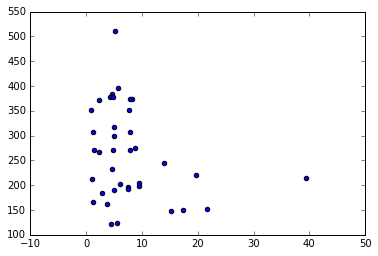

In [58]:
#Bar chart of data of interest
ind = np.arange(fish_2012.shape[0])
fig, ax = plt.subplots()
# ax.bar(ind, cardio_disease);#, tick_label=fish_2012.AreaName.values)
# np.arange(fish_2012.shape[0])
# fish_consumption

plt.scatter(fish_consumption, cardio_disease)

In [59]:
from scipy import stats
nan_mask = np.isnan(fish_consumption) | np.isnan(cardio_disease)
stats.linregress(fish_consumption[np.invert(nan_mask)],cardio_disease[np.invert(nan_mask)])

LinregressResult(slope=-3.4502314788551058, intercept=288.9484088492307, rvalue=-0.27001756624082462, pvalue=0.10110665888041022, stderr=2.0505295536132406)

In [ ]:
#Need to try PCA and other stuff... would be good to have an idea of some hopefully interesting things that students could find
#Maybe I can look this weekend.